In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance

from hnmchallenge.constant import *
from hnmchallenge.data_reader import DataReader

from hnmchallenge.evaluation.python_evaluation import map_at_k, recall_at_k
from hnmchallenge.feature_manager import FeatureManager
from hnmchallenge.datasets.last_week_last_week import LWLWDataset

from hnmchallenge.models.itemknn.itemknn import ItemKNN




/raid/home/edoardo/GitProjects/HnMChallenge/.venv/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
dataset = LWLWDataset()
dr = DataReader()

In [3]:
base_load_path = dataset._DATASET_PATH / "xgb_models"

In [4]:
VERSION = 0
DATASET = f"cutf_100_ItemKNN_tw_True_rs_False_{VERSION}.feather"
MODEL_NAME = f"xgb_{DATASET}.json"

In [5]:
model = xgb.XGBRanker()
model.load_model(base_load_path/MODEL_NAME)

In [6]:
from xgboost import plot_importance

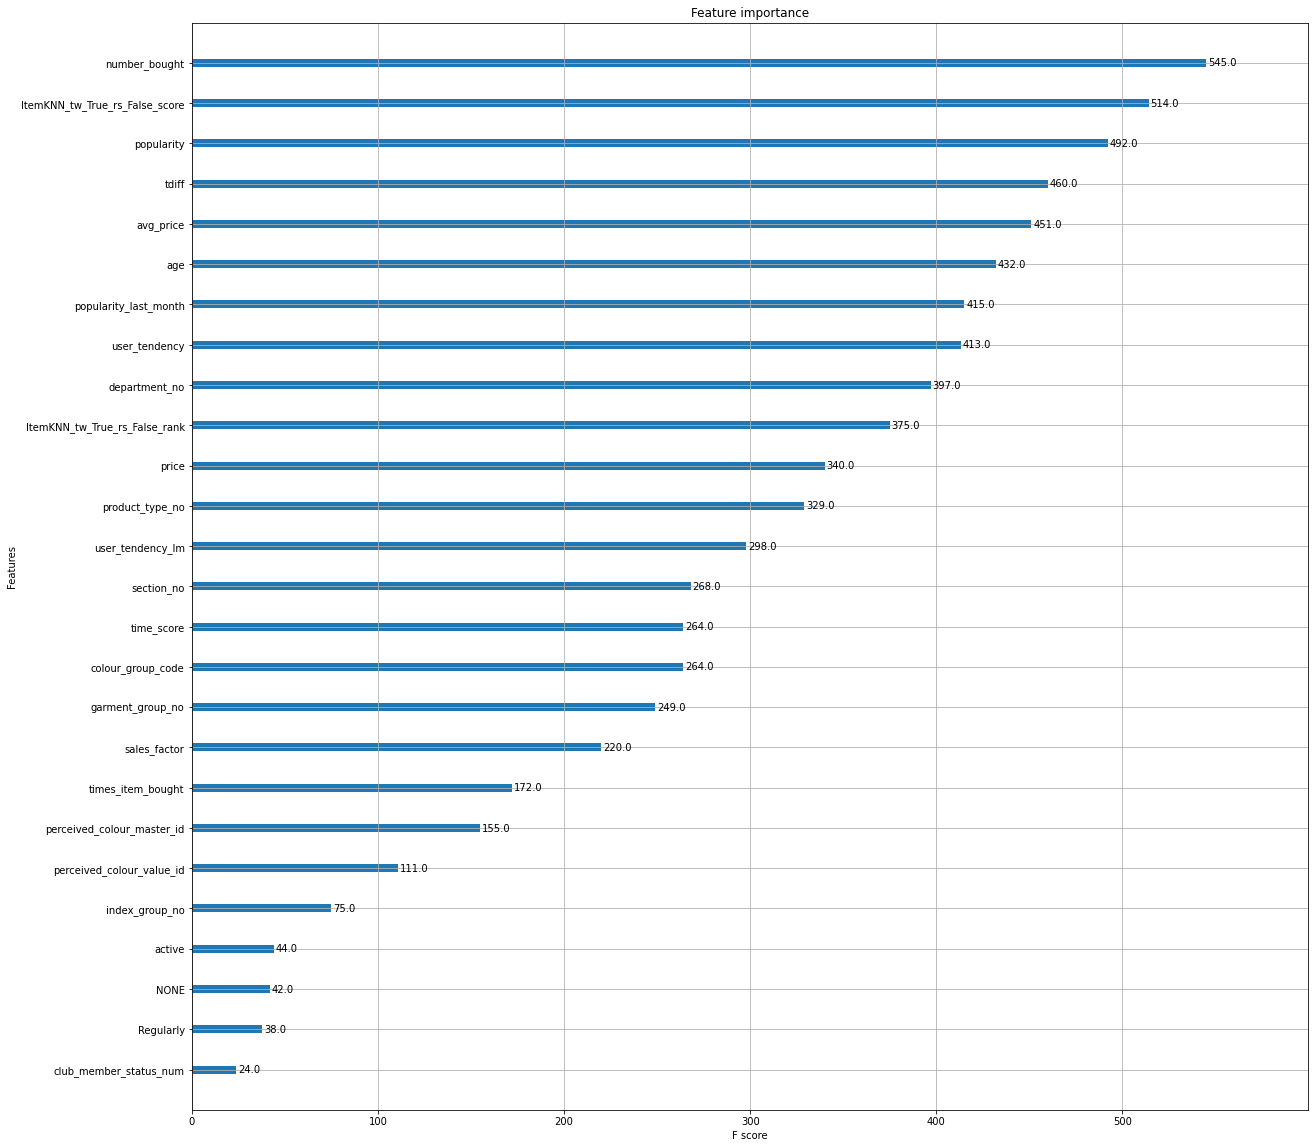

In [7]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_importance(model, ax=ax)
plt.show()

In [8]:
model.best_ntree_limit

114

In [ ]:
features = pd.read_feather(dataset._DATASET_PATH / f"dataset_dfs/full/{DATASET}")

# Remember to use the bert_ntree_limit when taking the predictions

In [ ]:
features.head()

In [ ]:
customer_article_df = features[[DEFAULT_USER_COL, DEFAULT_ITEM_COL]].copy()
X = features.drop([DEFAULT_USER_COL, DEFAULT_ITEM_COL], axis=1)

In [ ]:
X.head()

In [ ]:
y_pred = model.predict(X, ntree_limit=model.best_ntree_limit)

In [ ]:
customer_article_df["predicted_score"] = y_pred

In [ ]:
customer_article_df

In [ ]:
sorted_scores = customer_article_df.sort_values([DEFAULT_USER_COL, "predicted_score"], ascending=[True, False])

In [ ]:
sorted_scores

In [ ]:
sorted_scores_index = sorted_scores.reset_index(drop=True)

In [ ]:
cutoff = sorted_scores_index.groupby(DEFAULT_USER_COL).size().values
i=0 
filter_indices = []
for cut in cutoff:
    filter_indices.extend(range(i, i+12))
    i=i+cut

In [ ]:
cutoff.mean()

In [ ]:
final_df = sorted_scores_index.loc[filter_indices]

In [ ]:
final_df

In [ ]:
final_final_df = final_df.drop("predicted_score", axis=1)

In [ ]:
from hnmchallenge.submission_handler import SubmissionHandler
sh = SubmissionHandler()                                               

In [ ]:
sh.create_submission_filtered_data([final_final_df], sub_name="dataset_v00")
#sh.create_submission_filtered_data_full_users([final_final_df], sub_name="iknn_lastday")